   TERMINALNO  speed_tripmean_mean  speed_tripmean_max  speed_tripmax_mean  \
0           1            14.819857           32.476667           18.645111   
1           2             3.850738           26.009286            6.780909   
2           3             7.161065           13.425942           15.521351   
3           4             6.176600           16.111333           10.970918   
4           5             6.401703           32.544444           11.476118   

   speed_tripmax_max    Y  
0          32.779999  0.0  
1          36.119999  0.0  
2          25.440001  0.0  
3          33.310001  0.0  
4          53.480000  0.0  


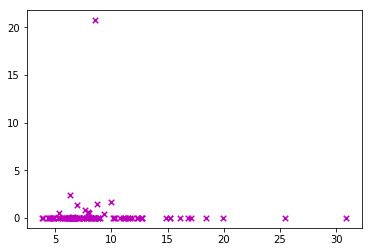

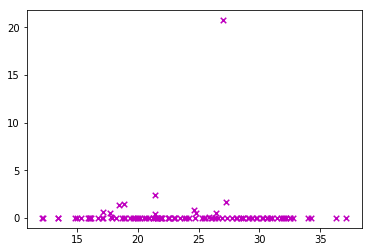

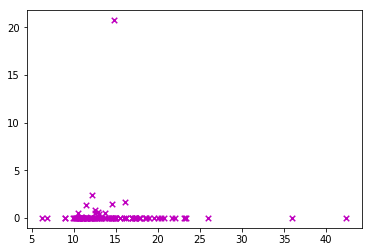

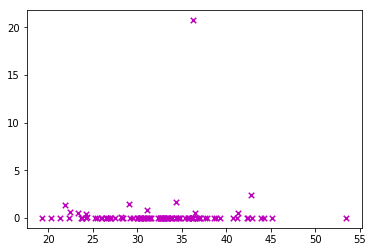

In [44]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt  

train_path=r'C:\Users\miya\Documents\GitHub\pingan\PINGAN-2018-train_demo.csv'
train=pd.read_csv(train_path)
train.head()

train['TIME_Tsfd']=0

train['TIME_Tsfd']=train['TIME'].apply(lambda x:datetime.datetime.fromtimestamp(x))

train['TIME_Tsfd']=pd.to_datetime(train['TIME_Tsfd'])
train['Month']=train['TIME_Tsfd'].dt.month
train['hour']=train['TIME_Tsfd'].dt.hour
train['week_of_year']=train['TIME_Tsfd'].dt.weekofyear
train['day_of_week']=train['TIME_Tsfd'].dt.dayofweek

train.head()

#计算每个用户，每个trip_id的平均速度
train_speed_grouped=train.groupby(['TERMINALNO','TRIP_ID'])['SPEED'].agg(['mean','max'])
train_speed_grouped.reset_index(inplace=True)
train_speed_grouped_1=train_speed_grouped.groupby('TERMINALNO')['mean'].agg(['mean','max'])
train_speed_grouped_2=train_speed_grouped.groupby('TERMINALNO')['max'].agg(['mean','max'])
train_speed_grouped_1.reset_index(inplace=True)
train_speed_grouped_2.reset_index(inplace=True)
train_speed_grouped_3=train.groupby('TERMINALNO')['Y'].agg(['mean'])
train_speed_grouped_3.reset_index(inplace=True)
train_speed_grouped_3.rename(columns={'mean':'Y'},inplace=True)

temp=pd.merge(train_speed_grouped_1,train_speed_grouped_2,on='TERMINALNO',how='left')
temp=pd.merge(temp,train_speed_grouped_3,on='TERMINALNO',how='left')
temp.rename(columns={'mean_x':'speed_tripmean_mean','mean_y':'speed_tripmax_mean',
                    'max_x':'speed_tripmean_max','max_y':'speed_tripmax_max'},inplace=True)
print(temp.head())
plt.figure(1)  
plt.scatter(temp['speed_tripmean_mean'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(2)  
plt.scatter(temp['speed_tripmean_max'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(3)  
plt.scatter(temp['speed_tripmax_mean'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.figure(4)  
plt.scatter(temp['speed_tripmax_max'],temp['Y'], marker = 'x', color = 'm', label='1', s = 30)
plt.show()